Três regressores foram usados para aplicar metricas de qualidades
* Regressão Linear
* SVR
* Florestas Randomicas

In [1]:
# importando bibliotecas basicas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importando regressores
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Lendo a base de dados
df = pd.read_csv('./data/temps.csv')
df.head(5)

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [5]:
# pre-processamento dos dados
## retirando os dados categoricos do dataset
df = pd.get_dummies(df)
df.head(5)

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
0,2016,1,1,45,45,45.6,45,43,50,44,29,1,0,0,0,0,0,0
1,2016,1,2,44,45,45.7,44,41,50,44,61,0,0,1,0,0,0,0
2,2016,1,3,45,44,45.8,41,43,46,47,56,0,0,0,1,0,0,0
3,2016,1,4,44,41,45.9,40,44,48,46,53,0,1,0,0,0,0,0
4,2016,1,5,41,40,46.0,44,46,46,46,41,0,0,0,0,0,1,0


In [6]:
## avaliação de dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   temp_2          348 non-null    int64  
 4   temp_1          348 non-null    int64  
 5   average         348 non-null    float64
 6   actual          348 non-null    int64  
 7   forecast_noaa   348 non-null    int64  
 8   forecast_acc    348 non-null    int64  
 9   forecast_under  348 non-null    int64  
 10  friend          348 non-null    int64  
 11  week_Fri        348 non-null    uint8  
 12  week_Mon        348 non-null    uint8  
 13  week_Sat        348 non-null    uint8  
 14  week_Sun        348 non-null    uint8  
 15  week_Thurs      348 non-null    uint8  
 16  week_Tues       348 non-null    uint8  
 17  week_Wed        348 non-null    uin

In [7]:
## resumo dos dados
df.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thurs,week_Tues,week_Wed
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483,0.143678,0.140805,0.143678,0.140805,0.140805,0.149425,0.140805
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179,0.351268,0.348321,0.351268,0.348321,0.348321,0.357021,0.348321
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


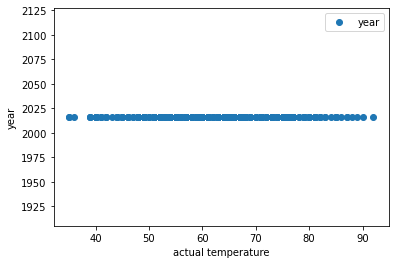

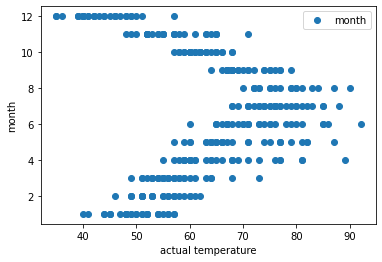

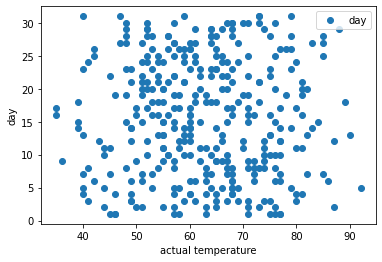

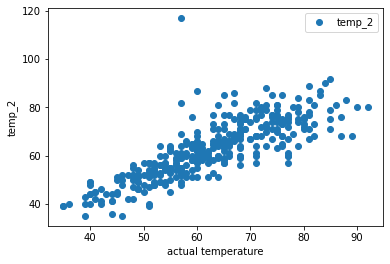

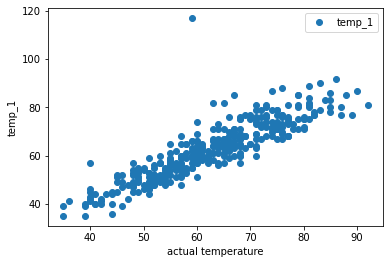

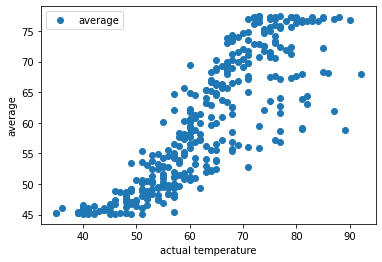

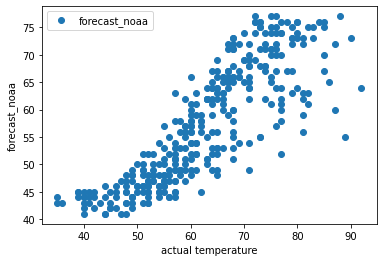

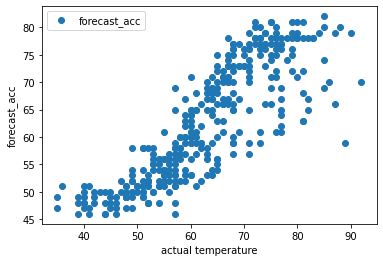

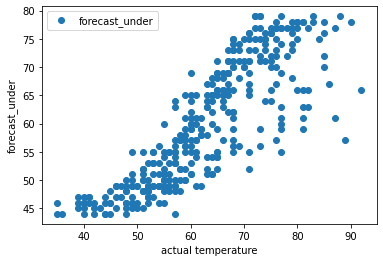

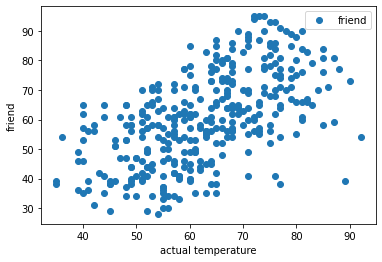

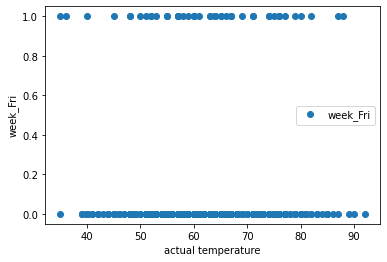

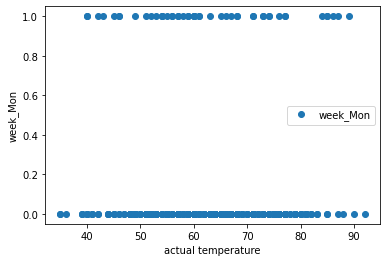

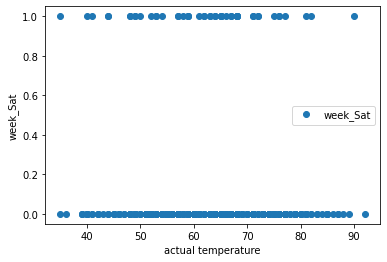

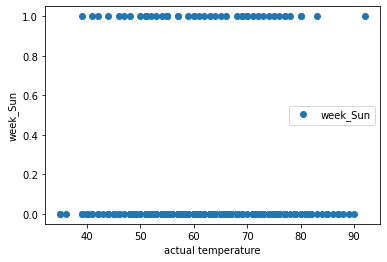

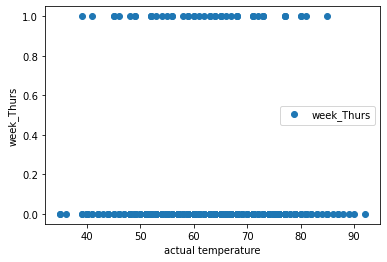

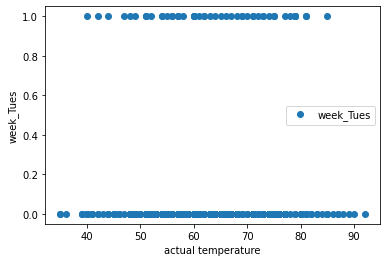

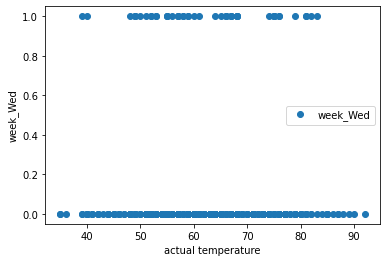

In [8]:
# plotando a correlação de todas as features com o target 'actual'
for i in df.columns[:]:
    if (i != 'actual'):
        df.plot(x='actual', y=i, style='o')
        plt.xlabel('actual temperature')
        plt.ylabel(i)
        plt.show()

In [9]:
# calculando a correlação de pearson
from scipy import stats
print('correlacao entre temp_1 e actual_temp, p-value: {}'.format(stats.pearsonr(x=df['temp_1'], y=df['actual'])))
print('correlacao entre average e actual_temp, p-value: {}'.format(stats.pearsonr(x=df['average'], y=df['actual'])))
print('correlacao entre friend e actual_temp, p-value: {}'.format(stats.pearsonr(x=df['friend'], y=df['actual'])))
print('correlacao entre day e actual_temp, p-value: {}'.format(stats.pearsonr(x=df['day'], y=df['actual'])))

correlacao entre temp_1 e actual_temp, p-value: (0.8778797811113407, 1.114448192690701e-112)
correlacao entre average e actual_temp, p-value: (0.8483653774165265, 1.365944852332691e-97)
correlacao entre friend e actual_temp, p-value: (0.5691445272567934, 2.906414712929772e-31)
correlacao entre day e actual_temp, p-value: (-0.021674878663301554, 0.6869981138508335)


In [10]:
# dividindo dataset em features e targets
X = df[['year', 'month', 'day', 'temp_2', 'temp_1', 'average',
       'forecast_noaa', 'forecast_acc', 'forecast_under', 'friend', 'week_Fri',
       'week_Mon', 'week_Sat', 'week_Sun', 'week_Thurs', 'week_Tues',
       'week_Wed']]
y = df[['actual']]

In [11]:
X_arr = np.array(X)
y_arr = np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
# divide os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
train_data, test_data, train_label, test_label = train_test_split(X_arr, y_arr, test_size=0.25, random_state=42)

In [14]:
# Criando um base line na media (é tambem o comportamento de medida que o MSE adota em seu calculo)
base_line_pred = X_test.iloc[:, list(df.columns).index('average')]

In [15]:
from sklearn import metrics
# calculando medidas de erro
## essas medidas sao calculadas a partir da comparacao com o valor real do nosso conjunto de teste
print('R2:', metrics.r2_score(y_true=y_test, y_pred=base_line_pred))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=base_line_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=base_line_pred)))
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_true=y_test, y_pred=base_line_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=base_line_pred))

R2: 0.6081589797570233
MSE: 54.4928735632184
RMSE: 7.381928851134939
RMSLE: 0.11221618980253842
MAE: 5.05977011494253


In [16]:
def mean_absolute_percentage_error(y_true, y_pred):
    a_y_true, a_y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((a_y_true - a_y_pred) / a_y_true)) * 100
    
print('MAPE:', mean_absolute_percentage_error(y_true=y_test, y_pred=base_line_pred))

MAPE: 20.558087684337504


In [17]:
print('MAPE:', mean_absolute_percentage_error(y_true=test_label, y_pred=base_line_pred))

MAPE: 20.558087684337504


In [18]:
# aplicando regressor linear
regression = LinearRegression().fit(X_train, y_train)

In [19]:
y_linear_pred = regression.predict(X_test)

In [20]:
# avaliar o modelo de regressao linear
print('R2:', metrics.r2_score(y_true=y_test, y_pred=y_linear_pred))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=y_linear_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_linear_pred)))
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_true=y_test, y_pred=y_linear_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_linear_pred))
print('MAPE:', mean_absolute_percentage_error(y_true=y_test, y_pred=y_linear_pred))

R2: 0.8124074776318297
MSE: 26.088273240190837
RMSE: 5.107668082421844
RMSLE: 0.07721282992570531
MAE: 3.7788833160191606
MAPE: 5.947128466114321


In [21]:
# Aplicando SVR
svr = SVR(kernel='rbf', epsilon=1.0).fit(X_train, y_train)

In [22]:
y_svr_pred = svr.predict(X_test)

In [23]:
# avaliar o modelo de support vector regressor
print('R2:', metrics.r2_score(y_true=y_test, y_pred=y_svr_pred))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=y_svr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_svr_pred)))
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_true=y_test, y_pred=y_svr_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_svr_pred))
print('MAPE:', mean_absolute_percentage_error(y_true=y_test, y_pred=y_svr_pred))

R2: 0.005203668575727183
MSE: 138.34516528116876
RMSE: 11.762022159525493
RMSLE: 0.18624835550732852
MAE: 9.519838682928853
MAPE: 15.754406797208754


O modelo de SVR não é um modelo apropriado, a principio, porque ele obteve um erro absoluto percentual medio de 15,75%, ou seja, o dobro da base line que é baseado apenas em valores médios.

In [24]:
# Aplicando o Random Forest Regressor
rand_forest = RandomForestRegressor(n_estimators=10, random_state=42).fit(X_train, y_train)

In [25]:
y_forest_pred = rand_forest.predict(X_test)

In [26]:
# avaliar o modelo de random forest regressor
print('R2:', metrics.r2_score(y_true=y_test, y_pred=y_forest_pred))
print('MSE:', metrics.mean_squared_error(y_true=y_test, y_pred=y_forest_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_forest_pred)))
print('RMSLE:', np.sqrt(metrics.mean_squared_log_error(y_true=y_test, y_pred=y_forest_pred)))
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_forest_pred))
print('MAPE:', mean_absolute_percentage_error(y_true=y_test, y_pred=y_forest_pred))

R2: 0.7829240023864443
MSE: 30.188505747126438
RMSE: 5.494406769354307
RMSLE: 0.08490493544473703
MAE: 4.216091954022988
MAPE: 21.344439593151503


O modelo Random Forest foi o pior modelo com MAPE = 21,34%

In [27]:
p = pd.DataFrame(data = {'real': y_test.actual, 'pred': y_forest_pred})
p.head(10)

,real,pred
255,66,71.1
114,61,64.4
314,52,50.1
268,66,64.2
167,70,64.9
124,82,68.7
203,85,77.7
224,84,74.4
284,65,63.4
153,92,76.6
